In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
q=pd.read_csv('jobs.csv')
w=pd.read_csv('job_clicks.csv')
q.head()

,jobID,job_category
0,1,IT
1,2,IT
2,3,IT
3,4,IT
4,5,IT


In [3]:
w.head()

,userId,jobId,Clicks
0,1,31,3
1,1,1029,66
2,1,1061,93
3,1,1129,0
4,1,1172,77


In [4]:
q.rename(columns={'jobID':'jobid'},inplace=True)
w.rename(columns={'jobId':'jobid'},inplace=True)

In [5]:
q.head()

,jobid,job_category
0,1,IT
1,2,IT
2,3,IT
3,4,IT
4,5,IT


In [6]:
w.head()

,userId,jobid,Clicks
0,1,31,3
1,1,1029,66
2,1,1061,93
3,1,1129,0
4,1,1172,77


In [7]:
q.max()

jobid           164979
job_category    Retial
dtype: object

In [8]:
w.max()

userId       671
jobid     163949
Clicks       100
dtype: int64

In [9]:
df = pd.merge(q,w) 
df.head() 

,jobid,job_category,userId,Clicks
0,1,IT,7,87
1,1,IT,9,81
2,1,IT,13,97
3,1,IT,15,91
4,1,IT,19,80


In [10]:
df.corrwith(df['Clicks'])

jobid     0.002419
userId   -0.002455
Clicks    1.000000
dtype: float64

In [11]:
df.describe()

,jobid,userId,Clicks
count,100004.000000,100004.000000,100004.000000
mean,12548.664363,347.011310,49.884105
std,26369.198969,195.163838,29.141325
min,1.000000,1.000000,0.000000
25%,1028.000000,182.000000,25.000000
50%,2406.500000,367.000000,50.000000
75%,5418.000000,520.000000,75.000000
max,163949.000000,671.000000,100.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100004 entries, 0 to 100003
Data columns (total 4 columns):
jobid           100004 non-null int64
job_category    100004 non-null object
userId          100004 non-null int64
Clicks          100004 non-null int64
dtypes: int64(3), object(1)
memory usage: 3.8+ MB


In [13]:
df.isnull().sum()

jobid           0
job_category    0
userId          0
Clicks          0
dtype: int64

In [14]:
df['Clicks'].unique().shape[0]

101

In [15]:
trend=pd.DataFrame(df.groupby('job_category')['Clicks'].mean())
trend["Number of Clicks"]=pd.DataFrame(df.groupby('job_category')['Clicks'].count())
trend

,Clicks,Number of Clicks
job_category,,
Banking,49.932285,9348
Business Intelligence,50.055170,5619
Finance,49.980927,11115
HR,49.663544,17185
IT,50.191463,22819
Management,49.549725,11262
Marketing,49.963991,13219
Retail,50.560209,764
Retial,49.478496,8673


In [16]:
df.groupby('job_category').count()

,jobid,userId,Clicks
job_category,,,
Banking,9348,9348,9348
Business Intelligence,5619,5619,5619
Finance,11115,11115,11115
HR,17185,17185,17185
IT,22819,22819,22819
Management,11262,11262,11262
Marketing,13219,13219,13219
Retail,764,764,764
Retial,8673,8673,8673


In [17]:
df.groupby('Clicks').count()

,jobid,job_category,userId
Clicks,,,
0,1023,1023,1023
1,946,946,946
2,1016,1016,1016
3,1014,1014,1014
4,993,993,993
...,...,...,...
96,1030,1030,1030
97,952,952,952
98,1015,1015,1015


In [18]:
df.groupby('jobid').count()

,job_category,userId,Clicks
jobid,,,
1,247,247,247
2,107,107,107
3,59,59,59
4,13,13,13
5,56,56,56
...,...,...,...
161944,1,1,1
162376,1,1,1
162542,1,1,1


In [19]:
df.groupby('userId').count()

,jobid,job_category,Clicks
userId,,,
1,20,20,20
2,76,76,76
3,51,51,51
4,204,204,204
5,100,100,100
...,...,...,...
667,68,68,68
668,20,20,20
669,37,37,37


In [20]:
df=df.dropna()

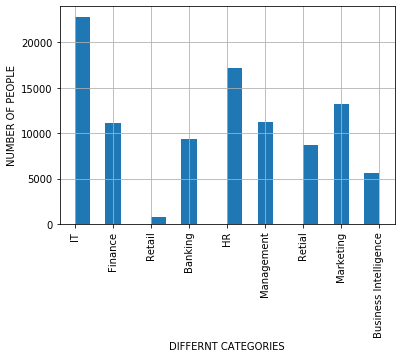

In [21]:
plt.xticks(rotation='vertical')
plt.ylabel("NUMBER OF PEOPLE")
plt.xlabel("DIFFERNT CATEGORIES")
df['job_category'].hist(bins=20)

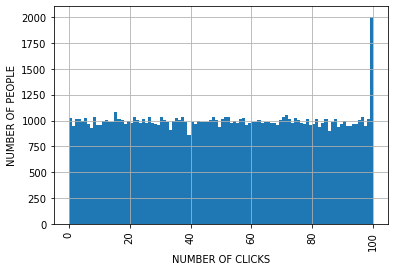

In [22]:
plt.xticks(rotation='vertical')
plt.ylabel("NUMBER OF PEOPLE")
plt.xlabel("NUMBER OF CLICKS")
df['Clicks'].hist(bins=100)

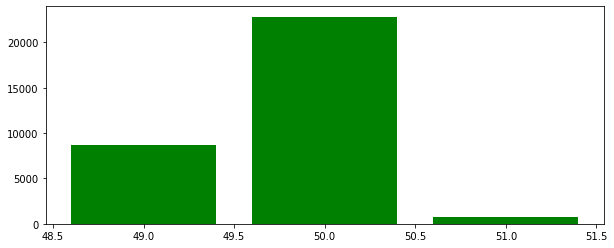

In [23]:
plt.figure(figsize =(10, 4))
ax=plt.bar(trend['Clicks'].round(),trend['Number of Clicks'],color='green')
plt.show()

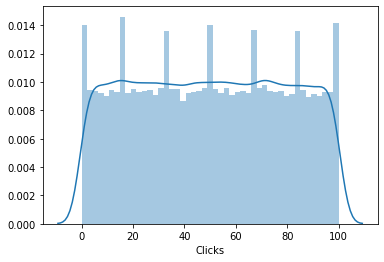

In [24]:
sns.distplot(df['Clicks'])

C:\Users\divyanshsharma11\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


<BarContainer object of 9 artists>

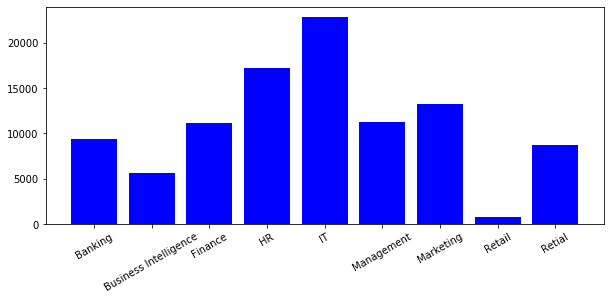

In [25]:
plt.figure(figsize =(10, 4))
plt.xticks(rotation=30)
ax=plt.subplot()
ax.bar(trend.head(25).index,trend['Number of Clicks'].head(25),color='b')

In [26]:
X=df.drop(['job_category'],axis=1)
y=df['job_category']

In [27]:
X.head()

,jobid,userId,Clicks
0,1,7,87
1,1,9,81
2,1,13,97
3,1,15,91
4,1,19,80


In [28]:
y.head()

0    IT
1    IT
2    IT
3    IT
4    IT
Name: job_category, dtype: object

In [29]:
df['job_category'].unique()

array(['IT', 'Finance', 'Retail', 'Banking', 'HR', 'Management', 'Retial',
       'Marketing', 'Business Intelligence'], dtype=object)

In [30]:
mp={'IT':1, 'Finance':2, 'Retail':3, 'Banking':4, 'HR':5, 'Management':6, 'Retial':7,'Marketing':8
    , 'Business Intelligence':9}

In [31]:
y=df['job_category'].map(mp)
y.head()

0    1
1    1
2    1
3    1
4    1
Name: job_category, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [33]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [34]:
X_train.shape,y_train.shape

((80003, 3), (80003,))

In [35]:
X_test.shape,y_test.shape

((20001, 3), (20001,))

Text(0, 0.5, 'Error Rate')

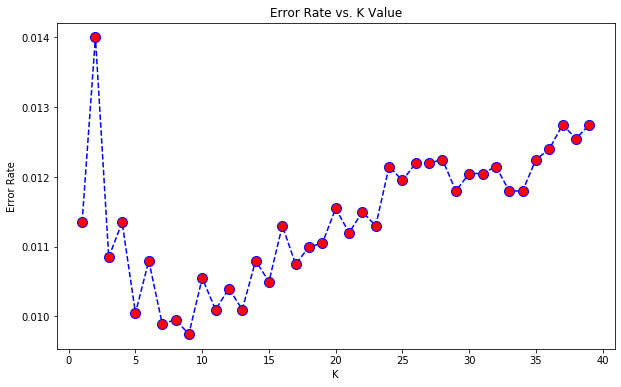

In [36]:
error_rate = [] 

# Will take some time 
for i in range(1, 40): 

    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(X_train, y_train) 
    pred_i = knn.predict(X_test) 
    error_rate.append(np.mean(pred_i != y_test)) 

plt.figure(figsize =(10, 6)) 
plt.plot(range(1, 40), error_rate, color ='blue', 
                linestyle ='dashed', marker ='o', 
        markerfacecolor ='red', markersize = 10) 

plt.title('Error Rate vs. K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate') 


In [37]:
knn = KNeighborsClassifier(n_neighbors =32) 
  
knn.fit(X_train, y_train) 
pred = knn.predict(X_test) 

In [38]:
pred

array([7, 7, 2, ..., 8, 8, 1], dtype=int64)

In [39]:
# Predictions and Evaluations 
# Let's evaluate our KNN model !  
from sklearn.metrics import classification_report 
print("------------------------------------------------------------------") 
print(classification_report(y_test, pred)) 
print("------------------------------------------------------------------")

------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.99      1.00      0.99      4527
           2       0.96      0.99      0.97      2230
           3       0.96      0.53      0.68       153
           4       0.99      0.97      0.98      1873
           5       0.99      0.99      0.99      3453
           6       1.00      1.00      1.00      2196
           7       0.99      1.00      0.99      1781
           8       1.00      0.99      1.00      2636
           9       1.00      0.99      0.99      1152

    accuracy                           0.99     20001
   macro avg       0.99      0.94      0.96     20001
weighted avg       0.99      0.99      0.99     20001

------------------------------------------------------------------


In [40]:
#TESTING AGAINST NEW VALUES
sd={'jobid':[9000,500,909],
    'userId':[1,1,1],
    'Clicks':[65,2,90]}

sdf=pd.DataFrame(sd,index=None)
my_pred=knn.predict(sdf)
my_pred

array([9, 5, 5], dtype=int64)

In [42]:
from sklearn import metrics
from sklearn.metrics import r2_score
print(' R-Squared :\t',metrics.r2_score(y_test, pred))

 R-Squared :	 0.9852533093404338
